In [1]:
# import libraries
from music21 import *
from random import random, randint

In [2]:
# shortcut to play a stream
def play(stream):
    midi.realtime.StreamPlayer(stream).play()

# Stagnation
## Idea
A person try to get out of its current situation by *stepping up* but without success. The person inevitably fall into its starting position !
## Application
The starting position of the person is a note, the person try to *step up* using higher notes. The probability of reaching the next higher note decrements with steps: the higher you go, the more difficult it is to climb and easier it is to fall back to the starting position.

In [3]:
# durations
WHOLE = 1
HALF = 0.5
QUARTER = 0.25
EIGHTH = 0.125
SIXTEENTH = 0.06125

dur = [WHOLE, HALF, QUARTER]

In [4]:
allNotes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

# scale
def getMajorScale(note):
    return [str(n) for n in scale.MajorScale(note).getPitches('C4', 'C5')]

scl = getMajorScale('D')
print(scl)

def appendNote(index, RightHand, LeftHand, d):
    if index == 0:
        RightHand.append(note.Note(scl[0], quarterLength = d * 4))
        LeftHand.append(chord.Chord([note.Note(scl[0], quarterLength = d * 8), scl[1], scl[2]]))
        RightHand.append(note.Note(scl[1], quarterLength = d * 4))
        #LeftHand.append(chord.Chord([note.Note(scl[1], quarterLength = DURATION * 4), "Ab3", "B3"]))
        #LeftHand.append(note.Rest(quarterLength = d * 4))
    else:
        RightHand.append(note.Note(scl[index + 2], quarterLength = d * 4))
        LeftHand.append(note.Rest(quarterLength = d * 4))

['C#4', 'D4', 'E4', 'F#4', 'G4', 'A4', 'B4']


In [5]:
# initialize partition
RightHand = stream.Part()
RightHand.insert(0, instrument.ElectricGuitar())
RightHand.append(meter.TimeSignature('4/4'))
LeftHand = stream.Part()
LeftHand.insert(0, instrument.Guitar())
LeftHand.append(meter.TimeSignature('4/4'))

In [6]:
current_state = 0 # which reprensent fall

probabilities = [0.5, 0.6, 0.7, 0.8, 0.9]

In [7]:
# algorithm
d = dur[randint(0, len(dur) - 1)]
appendNote(0, RightHand, LeftHand, WHOLE)
for i in range(10):
    r = random()
    
    if r < probabilities[current_state]:  
        d = dur[randint(0, len(dur) - 1)]
        appendNote(0, RightHand, LeftHand, d)
        current_state = 0
    elif current_state == 4:
        appendNote(4, RightHand, LeftHand, d)
    else:
        appendNote(current_state + 1, RightHand, LeftHand, d)
        current_state += 1
d = dur[randint(0, len(dur) - 1)]
appendNote(0, RightHand, LeftHand, WHOLE)

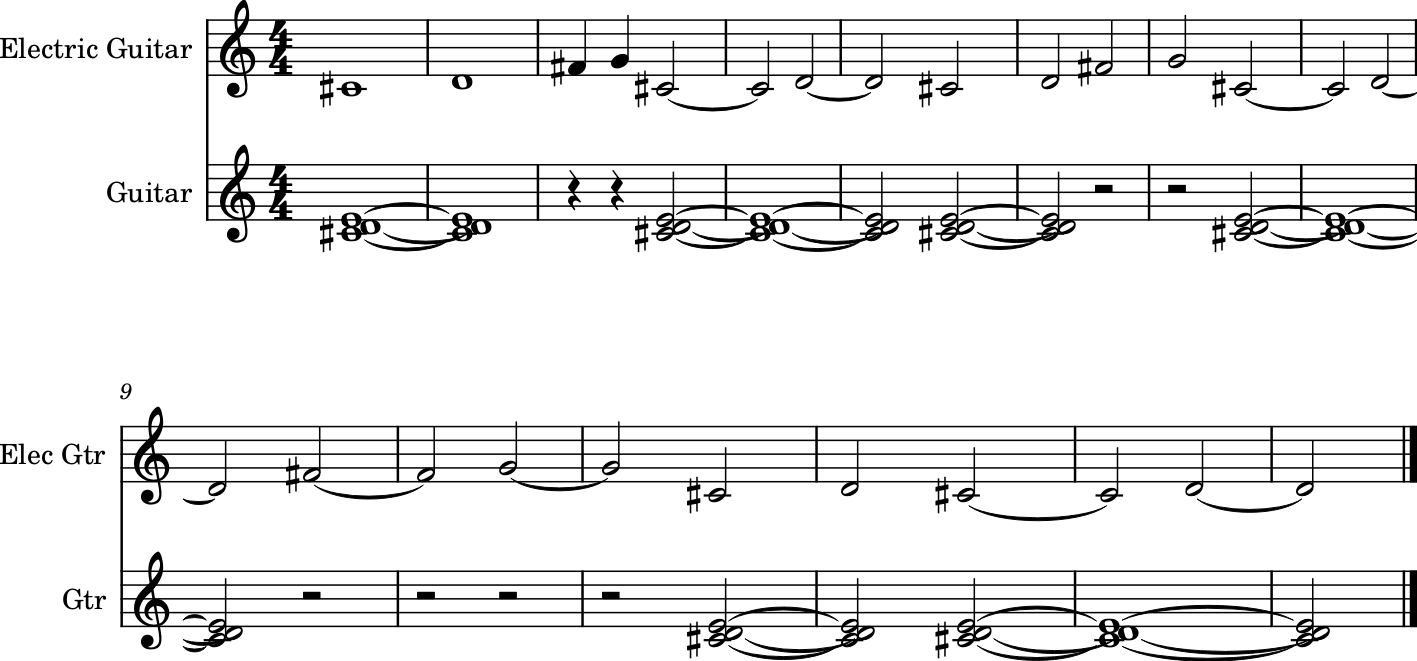

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [8]:
# put all together
s = stream.Score()
s.insert(0, RightHand)
s.insert(0, LeftHand)
s.show()
play(s)